### Tutorial 7 : Digits data prediction using neural network

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [58]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
X_test.shape

(10000, 28, 28)

In [61]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

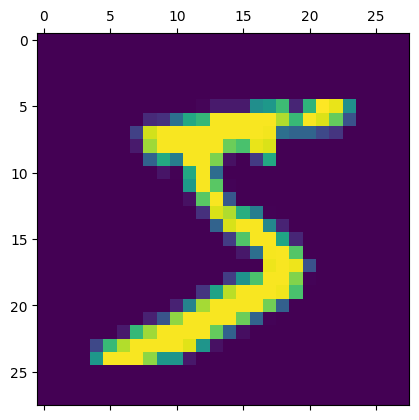

In [62]:
plt.matshow(X_train[0])

In [63]:
y_train[0]

np.uint8(5)

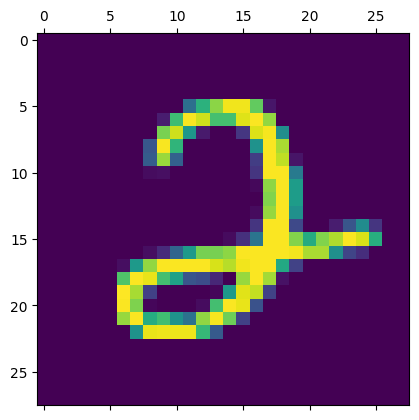

In [64]:
plt.matshow(X_train[16])

In [65]:
y_train[16]

np.uint8(2)

##### Now we have to change the 2 diamensional array to 1 diamensional array

In [66]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [67]:
X_train.shape

(60000, 28, 28)

In [68]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
# Here when reshaping we are giving same length which is 60000 and the combining features to via 28*28 = 784 

In [69]:
X_train_flatten.shape

(60000, 784)

In [70]:
X_train_flatten

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784), dtype=uint8)

In [71]:
X_train_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

##### Now do scalling. Cover te value from 0 to 1

In [72]:
X_train_flatten_scalled = X_train_flatten/255
X_test_flatten_scalled = X_test_flatten/255
# IMPORTANT: Scalling is optional. But in may case scalling will improve the accuracy
# We can device by the biggest value available here. That is 255 here. So this will divide each value by 255

In [73]:
X_train_flatten_scalled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 784))

In [74]:
X_train_flatten_scalled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [75]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=((784,)), activation='sigmoid')
]
)
# This is the place where we will create the model.  keras.layers.Dense(numberOfOutputElement, input_shape=((numberOfInputElement,)), activation='giveActivationFunctionHere')
# keras.layers.Dense is used because, we need to map each input elements to each output elements
# First argument of keras.layers.Dense takes number of output element, next argument takes input share which has number of input element and then the activation 
# Above is just the input layer mapped with output layer.
# Here there is no hidden layer, we can pass multiple hidden layer as like keras.layers.Dense with different params. We can see that later

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# This complie is used to configure model for training
# optimizer is the method of training. Helps to train effectively
# There are multiple different loss function. These are used to compare predicted and truth internally and again pass inside for backword propagation error or for resolving
# metrics should be accuracy here as we want to create the model with more accurate score.

# We can see all the params in details in upcoming days


C:\Users\Dell-Precession\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.fit(X_train_flatten_scalled, y_train, epochs=5)
# This is for training the model with training values of X and y
# Here it is the numner of times the model needs iterate the training samples. Each subset will be divide into training data set into given epochs number of iteration and train

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8787 - loss: 0.4671
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9160 - loss: 0.3028
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9209 - loss: 0.2828
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.2727
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.2665


In [77]:
model.evaluate(X_test_flatten_scalled, y_test)
# This is to evaluate with the test data set.
# For training it uses training data set and shows score in fit. But in evalute this is with test data set and shows the real score

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9266 - loss: 0.2676


[0.2675582468509674, 0.9265999794006348]

In [78]:
y_test_predicted = model.predict(X_test_flatten_scalled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [79]:
np.argmax(y_test_predicted[0])

np.int64(7)

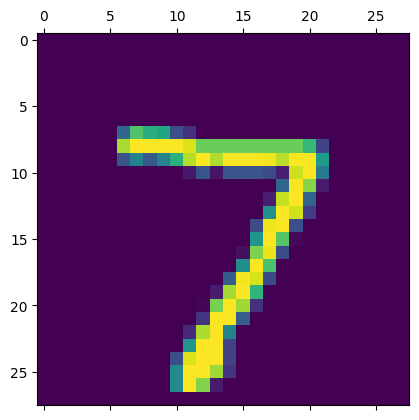

In [80]:
plt.matshow(X_test[0])

In [81]:
np.argmax(y_test_predicted[0])

np.int64(7)

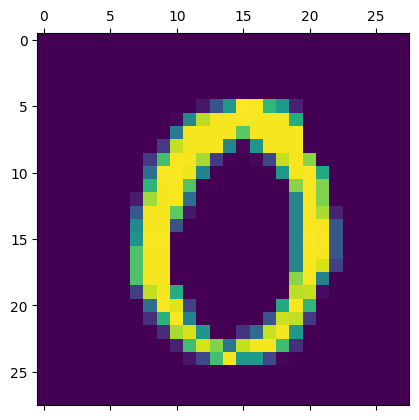

In [82]:
plt.matshow(X_test[13])

In [115]:
np.argmax(y_test_predicted[13])

np.int64(0)

In [124]:
y_predicted_labels = [np.argmax(x) for x in y_test_predicted]

In [125]:
y_predicted_labels[13]

np.int64(0)

In [126]:
y_test[13]

np.uint8(0)

In [128]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [129]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    5,    4,    3,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   6,    8,  925,   16,    7,    3,   12,   11,   40,    4],
       [   4,    0,   22,  914,    0,   25,    2,   11,   25,    7],
       [   2,    1,    5,    1,  912,    0,    9,    4,   10,   38],
       [  11,    3,    4,   31,    9,  773,   16,    5,   36,    4],
       [  15,    3,    6,    1,    7,   10,  912,    2,    2,    0],
       [   1,    5,   22,    6,    8,    0,    0,  957,    5,   24],
       [   7,    7,    7,   16,    9,   18,    9,   14,  883,    4],
       [  10,    7,    1,   10,   26,    7,    0,   28,    9,  911]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

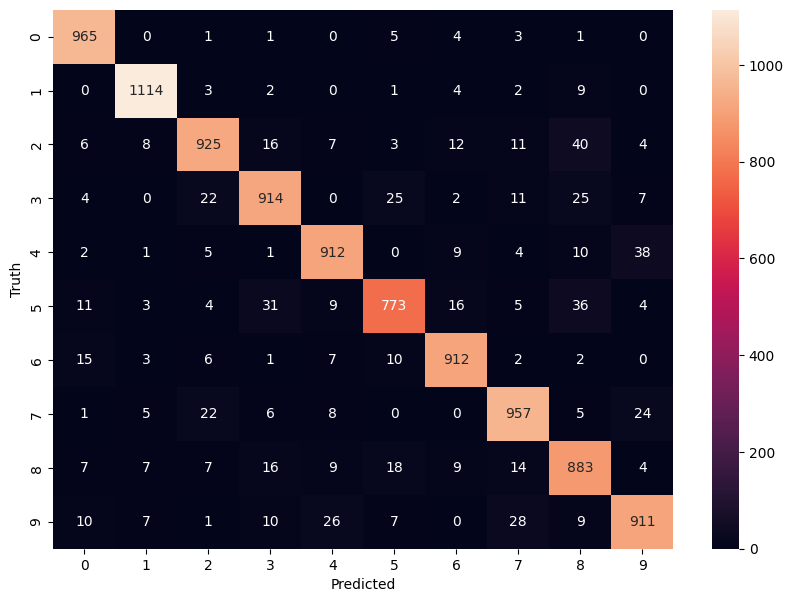

In [130]:
import seaborn as sb
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### This figure will be used to analyse how much is the truth and the predict and what value went wrong and in how many data

######## Here when truth was 2, model predicted 8 in 40 times

In [154]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=((784,)), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]
)
#Here we have added one hidden layer with 100 neurons to see how it performs. 
#Also we have given activation as relu. We will see what is relu in later tutorial

C:\Users\Dell-Precession\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [156]:
model2.fit(X_train_flatten_scalled, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9229 - loss: 0.2699
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9651 - loss: 0.1192
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9811 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9843 - loss: 0.0508


In [157]:
model2.evaluate(X_test_flatten_scalled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0750


[0.07498844712972641, 0.9772999882698059]

##### Now when adding the hidden layer, the score was improved

In [165]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]
)
## To flatten we can use  keras.layers.Flatten. This will take care of making to one diamenstion.
## Scalling still we need to take care

In [166]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [167]:
X_train_scalled = X_train/255
X_test_scalled = X_test/255

In [168]:
model3.fit(X_train_scalled, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9224 - loss: 0.2741
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9628 - loss: 0.1264
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9732 - loss: 0.0901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0681
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0554


In [169]:
model3.evaluate(X_test_scalled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0801


[0.08014624565839767, 0.9771000146865845]

##### Here it will do the same, but the flatternning is taken care